# ML Experiment-8

#### Dataset-1 (Synthetic Data)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [ ]:
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.7, random_state=42)

In [ ]:
features[:5]

array([[  9.67747002,   3.25251857],
       [ -9.5825094 ,  11.23342289],
       [ -6.91269348,  -9.3026964 ],
       [-10.78945491, -10.68026178],
       [ -8.47091203,  -4.58618393]])

In [ ]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [ ]:
X[:5]

array([[ 2.12188705,  0.25347404],
       [-1.50862947,  1.40806052],
       [-1.00536772, -1.5628717 ],
       [-1.73613935, -1.76216219],
       [-1.29909276, -0.88054031]])

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
lowest_sse = kmeans.inertia_
final_centroids = kmeans.cluster_centers_
iterations_to_converge = kmeans.n_iter_
predicted_labels = kmeans.predict(X)

print(f"Lowest SSE: {lowest_sse}")
print(f"Final Centroid Locations:\n{final_centroids}")
print(f"Iterations to Converge: {iterations_to_converge}")
print(f"Predicted Labels: {predicted_labels[:10]}")

Lowest SSE: 72.55689689365892
Final Centroid Locations:
[[ 1.19933242  0.13126124]
 [-0.92404827 -1.18822514]
 [-0.25738366  1.05892303]]
Iterations to Converge: 5
Predicted Labels: [0 2 1 1 1 1 2 1 0 1]


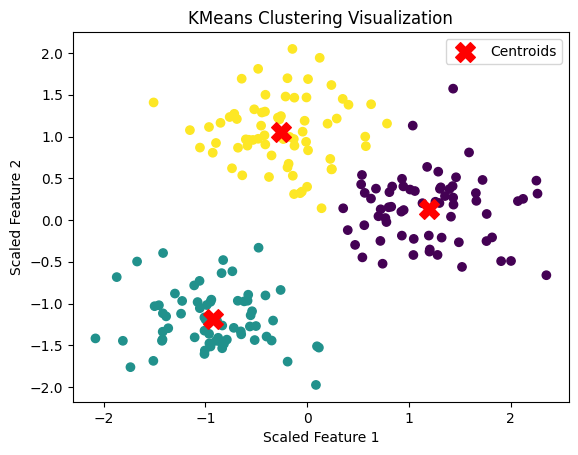

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('KMeans Clustering Visualization')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.legend()
plt.show()

In [ ]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

min_sse = min(sse)
min_k = sse.index(min_sse)+1
print(f"The lowest SSE value is: {min_sse:.2f} for k= {min_k}")

The lowest SSE value is: 27.47 for k= 10


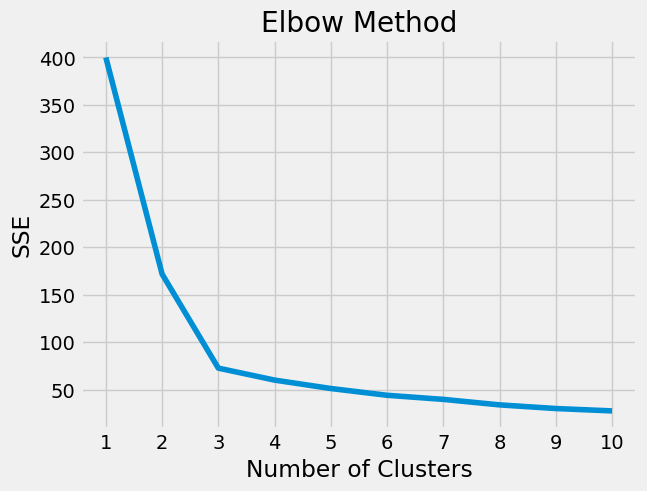

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
silhouette_scores = []
print("Silhouette Scores: ")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.3f}")

max_silhouette_score = max(silhouette_scores)
max_silhouette_index = silhouette_scores.index(max_silhouette_score) + 2

print(f"\nThe maximum Silhouette Score is: {max_silhouette_score} for k={max_silhouette_index}")

Silhouette Scores: 
k=2, Silhouette Score=0.549
k=3, Silhouette Score=0.598
k=4, Silhouette Score=0.497
k=5, Silhouette Score=0.393
k=6, Silhouette Score=0.340
k=7, Silhouette Score=0.336
k=8, Silhouette Score=0.352
k=9, Silhouette Score=0.365
k=10, Silhouette Score=0.365

The maximum Silhouette Score is: 0.5979015636027394 for k=3


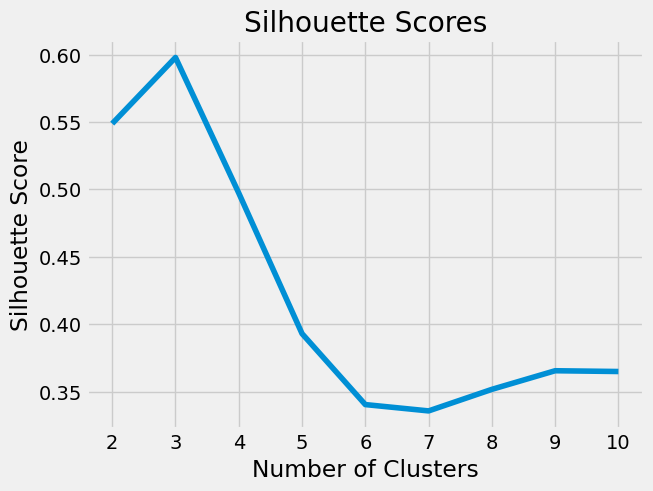

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_scores)
plt.xticks(range(2, 11))
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
db_index = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 0.86


#### Dataset-2 (Wine Dataset)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ehsanesmaeili/red-and-white-wine-quality-merged")

print("Path to dataset files:", path)

100%|██████████| 100k/100k [00:00<00:00, 57.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ehsanesmaeili/red-and-white-wine-quality-merged/versions/1


In [ ]:
df_wine = pd.read_csv(f"{path}/wine_quality_merged.csv")
display(df_wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
print("Missing values before handling:")
display(df_wine.isnull().sum())

Missing values before handling:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
X_wine = df_wine.drop(['type', 'quality'], axis=1)

scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

display(X_wine_scaled[:5])

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813],
       [ 3.07381662, -0.36243847,  1.66108525, -0.7447781 ,  0.54141159,
        -0.76207424, -0.98632406,  1.10169412, -0.3638682 ,  0.32751041,
        -0.58006813],
       [ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416]])

In [ ]:
kmeans_wine = KMeans(n_clusters=2, init="random", n_init=10, max_iter=300, random_state=42)
kmeans_wine.fit(X_wine_scaled)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [ ]:
lowest_sse_wine = kmeans_wine.inertia_
final_centroids_wine = kmeans_wine.cluster_centers_
iterations_to_converge_wine = kmeans_wine.n_iter_
predicted_labels_wine = kmeans_wine.labels_

print(f"Lowest SSE (Wine Dataset): {lowest_sse_wine}")
print(f"\nFinal Centroid Locations (Wine Dataset):\n{final_centroids_wine}")
print(f"\nIterations to Converge (Wine Dataset): {iterations_to_converge_wine}")
print(f"\nPredicted Labels for the first 10 points (Wine Dataset): {predicted_labels_wine[:10]}")

Lowest SSE (Wine Dataset): 56143.939126671045

Final Centroid Locations (Wine Dataset):
[[-0.28036952 -0.39540801  0.11444421  0.20009572 -0.31282219  0.28178085
   0.40171103 -0.23060082 -0.19195961 -0.28556314  0.02581654]
 [ 0.82763583  1.16722328 -0.33783319 -0.59067186  0.92343436 -0.83180199
  -1.18582946  0.68072127  0.56665448  0.84296711 -0.07620904]]

Iterations to Converge (Wine Dataset): 5

Predicted Labels for the first 10 points (Wine Dataset): [1 1 1 1 1 1 1 1 1 1]


In [ ]:
sse_wine = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_wine_scaled)
    sse_wine.append(kmeans.inertia_)

min_sse_wine = min(sse_wine)
min_k_wine = sse_wine.index(min_sse_wine)+1
print(f"The lowest SSE value is: {min_sse_wine:.2f} for k= {min_k_wine}")

The lowest SSE value is: 30749.41 for k= 10


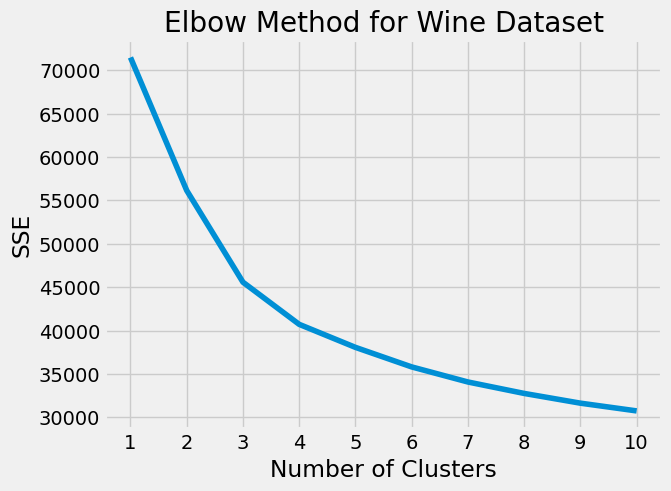

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse_wine)
plt.xticks(range(1, 11))
plt.title('Elbow Method for Wine Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

Silhouette Scores (Wine Dataset): 
k=2, Silhouette Score=0.276
k=3, Silhouette Score=0.235
k=4, Silhouette Score=0.248
k=5, Silhouette Score=0.181
k=6, Silhouette Score=0.187
k=7, Silhouette Score=0.180
k=8, Silhouette Score=0.157
k=9, Silhouette Score=0.141
k=10, Silhouette Score=0.134

The maximum Silhouette Score is: 0.2764785769201971 for k=2


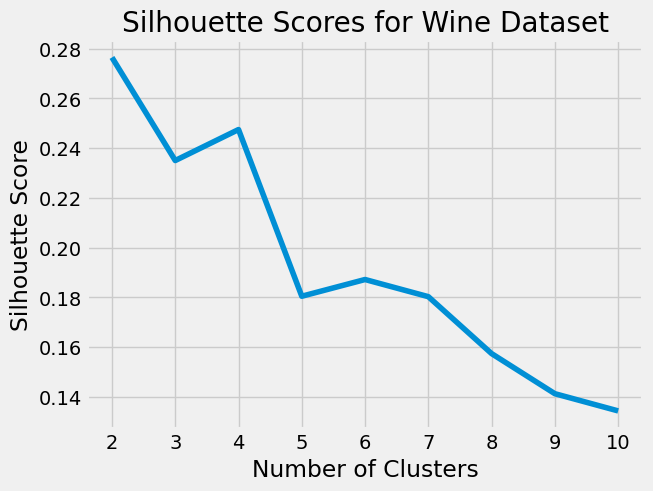

In [ ]:
silhouette_scores_wine = []
print("Silhouette Scores (Wine Dataset): ")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_wine_scaled)
    score = silhouette_score(X_wine_scaled, kmeans.labels_)
    silhouette_scores_wine.append(score)
    print(f"k={k}, Silhouette Score={score:.3f}")

max_silhouette_score_wine = max(silhouette_scores_wine)
max_silhouette_index_wine = silhouette_scores_wine.index(max_silhouette_score_wine) + 2

print(f"\nThe maximum Silhouette Score is: {max_silhouette_score_wine} for k={max_silhouette_index_wine}")

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_scores_wine)
plt.xticks(range(2, 11))
plt.title('Silhouette Scores for Wine Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
db_index_wine = davies_bouldin_score(X_wine_scaled, predicted_labels_wine)
print(f"Davies-Bouldin Index (Wine Dataset): {db_index_wine:.2f}")

Davies-Bouldin Index (Wine Dataset): 1.60
